In [15]:
from sklearn import model_selection, datasets, metrics, tree, ensemble

import numpy as np
import pandas as pd

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
boston = datasets.load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
n = len(boston.data)
X = boston.data
y = boston.target
X_train=np.array(X[:int(0.75*n)])
X_test=np.array(X[int(0.75*n):])
y_train=np.array(y[:int(0.75*n)])
y_test=np.array(y[int(0.75*n):])

In [7]:
base_algorithms_list = []
coefficients_list = []

def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)]) for x in X]

def L_derivative(y, z):
    return y - z


for i in range(50):    
    if i==0:
        model = tree.DecisionTreeRegressor(max_depth=5, random_state=42)
        model.fit(X_train,y_train)
    
        base_algorithms_list.append(model)
        coefficients_list.append(0.9 / (1.0 + i))
        
        print (np.sqrt(metrics.mean_squared_error(y_test, gbm_predict(X_test))))
        continue
    
    b = tree.DecisionTreeRegressor(max_depth=5, random_state=42)
    z = gbm_predict(X_train)
    b.fit(X_train, L_derivative(y_train, z))
    
    base_algorithms_list.append(b)
    coefficients_list.append(0.9 / (1.0 + i))
    
    print ("%d: error %.2f" % (i, np.sqrt(metrics.mean_squared_error(y_test, gbm_predict(X_test)))))
    
    
print ("Result:")
answer1 = np.sqrt(metrics.mean_squared_error(y_test, gbm_predict(X_test)))
print (answer1)


4.258124603131531
1: error 4.41
2: error 4.39
3: error 4.46
4: error 4.50
5: error 4.52
6: error 4.55
7: error 4.61
8: error 4.63
9: error 4.65
10: error 4.66
11: error 4.67
12: error 4.69
13: error 4.71
14: error 4.71
15: error 4.73
16: error 4.74
17: error 4.74
18: error 4.75
19: error 4.75
20: error 4.76
21: error 4.76
22: error 4.76
23: error 4.76
24: error 4.76
25: error 4.76
26: error 4.76
27: error 4.77
28: error 4.77
29: error 4.78
30: error 4.78
31: error 4.78
32: error 4.79
33: error 4.79
34: error 4.79
35: error 4.79
36: error 4.79
37: error 4.80
38: error 4.80
39: error 4.80
40: error 4.80
41: error 4.80
42: error 4.81
43: error 4.80
44: error 4.80
45: error 4.80
46: error 4.81
47: error 4.81
48: error 4.81
49: error 4.81
Result:
4.812550945781194


In [8]:
import xgboost as xgb

In [9]:
depths = range(3,100,5)
n_trees = range(10,500,40)
ntree_res=[]
for n_tree in n_trees:
    gbm = xgb.XGBRegressor(max_depth=3, n_estimators=n_tree, learning_rate=0.05).fit(X_train, y_train)
    predictions = gbm.predict(X_test)
    ntree_res.append(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

depth_res=[]
for depth in depths:
    gbm = xgb.XGBRegressor(max_depth=depth, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)
    predictions = gbm.predict(X_test)
    depth_res.append(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

[23:26:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:26:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:26:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:26:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:26:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:26:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:26:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:26:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:26:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

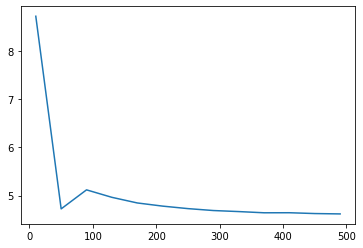

In [10]:
plt.plot(n_trees,ntree_res)

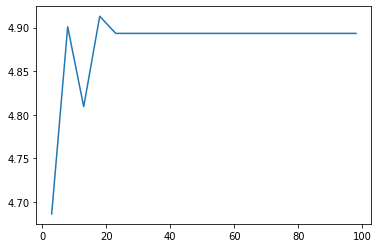

In [11]:
plt.plot(depths,depth_res)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)

pred = lreg.predict(X_test)

answer5 = np.sqrt(metrics.mean_squared_error(y_test, pred))
print (answer5)

8.254979753549161
